In [1]:
#!pip install pandas plotnine
# use any plotting library seaborn matplotlib,..........
from sklearn.neighbors import NearestNeighbors

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from plotnine import *
from sklearn import *


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
 from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from numpy import pi, sin, cos
%matplotlib inline

In [10]:
dataset1 = sklearn.datasets.make_circles(n_samples=1500, factor=.5, noise=.05)
dataset1=pd.DataFrame(dataset1[0])

dataset2 = sklearn.datasets.make_moons(n_samples=1500, noise=.05)
dataset2=pd.DataFrame(dataset2[0])

dataset3 = sklearn.datasets.make_blobs(n_samples=1500, random_state=8)
dataset3=pd.DataFrame(dataset3[0])


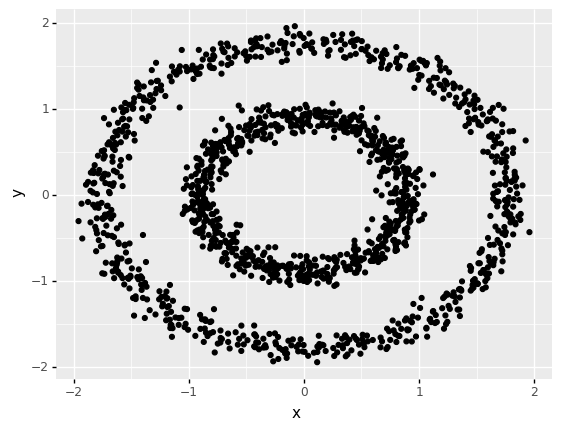

<ggplot: (112548574901)>

In [11]:
z1 = StandardScaler()
dataset1[["x","y"]] = z1.fit_transform(dataset1)
ggplot(dataset1, aes(x = "x", y = "y")) + geom_point() 

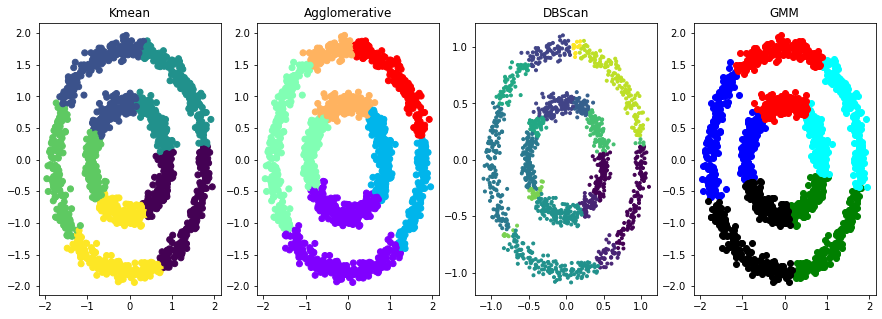

In [32]:
df = dataset1[['x','y']]
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.set_title("Kmean")
ax2.set_title("Agglomerative")
ax3.set_title("DBScan")
ax4.set_title("GMM")

#kmean
kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
kmeans.labels_
kmeans.transform
label = kmeans.fit_predict(df)
dataset1['label'] = label
ax1.scatter(dataset1['x'],dataset1['y'], c=label)

# AgglomatriveCluster
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)
aglabel = cluster.labels_
dataset1['aglabel']=aglabel
ax2.scatter(dataset1['x'],dataset1['y'], c=cluster.labels_, cmap='rainbow')

#DBScan
db = DBSCAN(eps=.73, min_samples=5).fit(df)
dbscan_clusters = db.fit_predict(dataset1)
labels = db.labels_
ax3.scatter(dataset1.iloc[:, 0], dataset1.iloc[:, 1],marker=".", c=dbscan_clusters)

#GMM
gmm = GaussianMixture(n_components=5)  # training gaussian mixture model
gmm.fit(df)
labels = gmm.predict(df) #predictions from gmm
frame = pd.DataFrame(df)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']
color=['blue','green','cyan', 'black', 'red']
for k in range(0,5):
    data = frame[frame["cluster"]==k]
    ax4.scatter(data["Weight"],data["Height"],c=color[k])

plt.show()

In [29]:
#Claculating the inertia and the Silhouette score
kmean_silhouette = silhouette_score(dataset1, kmeans.labels_)
print("K-means Inertia score is: {} and Silhouette  score is: {}".format(kmeans.inertia_, kmean_silhouette))

K-means Inertia score is: 636.8415548630081 and Silhouette  score is: 0.526047659206795


In [30]:
#Claculating the inertia and the Silhouette score
agglo_silhouette = silhouette_score(dataset1, aglabel)
print("Agglomerative Silhouette  score is: {}".format(agglo_silhouette))

Agglomerative Silhouette  score is: 0.41234847481177644


In [31]:
#Claculating the Silhouette score
dbscan_silhouette = silhouette_score(dataset1, labels)
print("DBSCAN Silhouette is: {}".format(dbscan_silhouette))

DBSCAN Silhouette is: 0.334022353792062
